In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JAYESH262002/Data-Set-CSV/main/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#!pip install ydata_profiling
from ydata_profiling import ProfileReport
tool = ProfileReport(df)
tool.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
#!pip install pandas_profiling
#from pandas_profiling import ProfileReport

tools = ProfileReport(df)

tools.to_widgets()

In [5]:
x = df.drop("quality", axis=1) #feature
y = df["quality"]              #label

In [6]:
# Spliting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [7]:
len(x_train), len(y_train), len(x_test), len(y_test)

(1199, 1199, 400, 400)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [9]:
# Finding the pattern between the data
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
dt_model.score(x_test, y_test)

0.58

In [11]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree

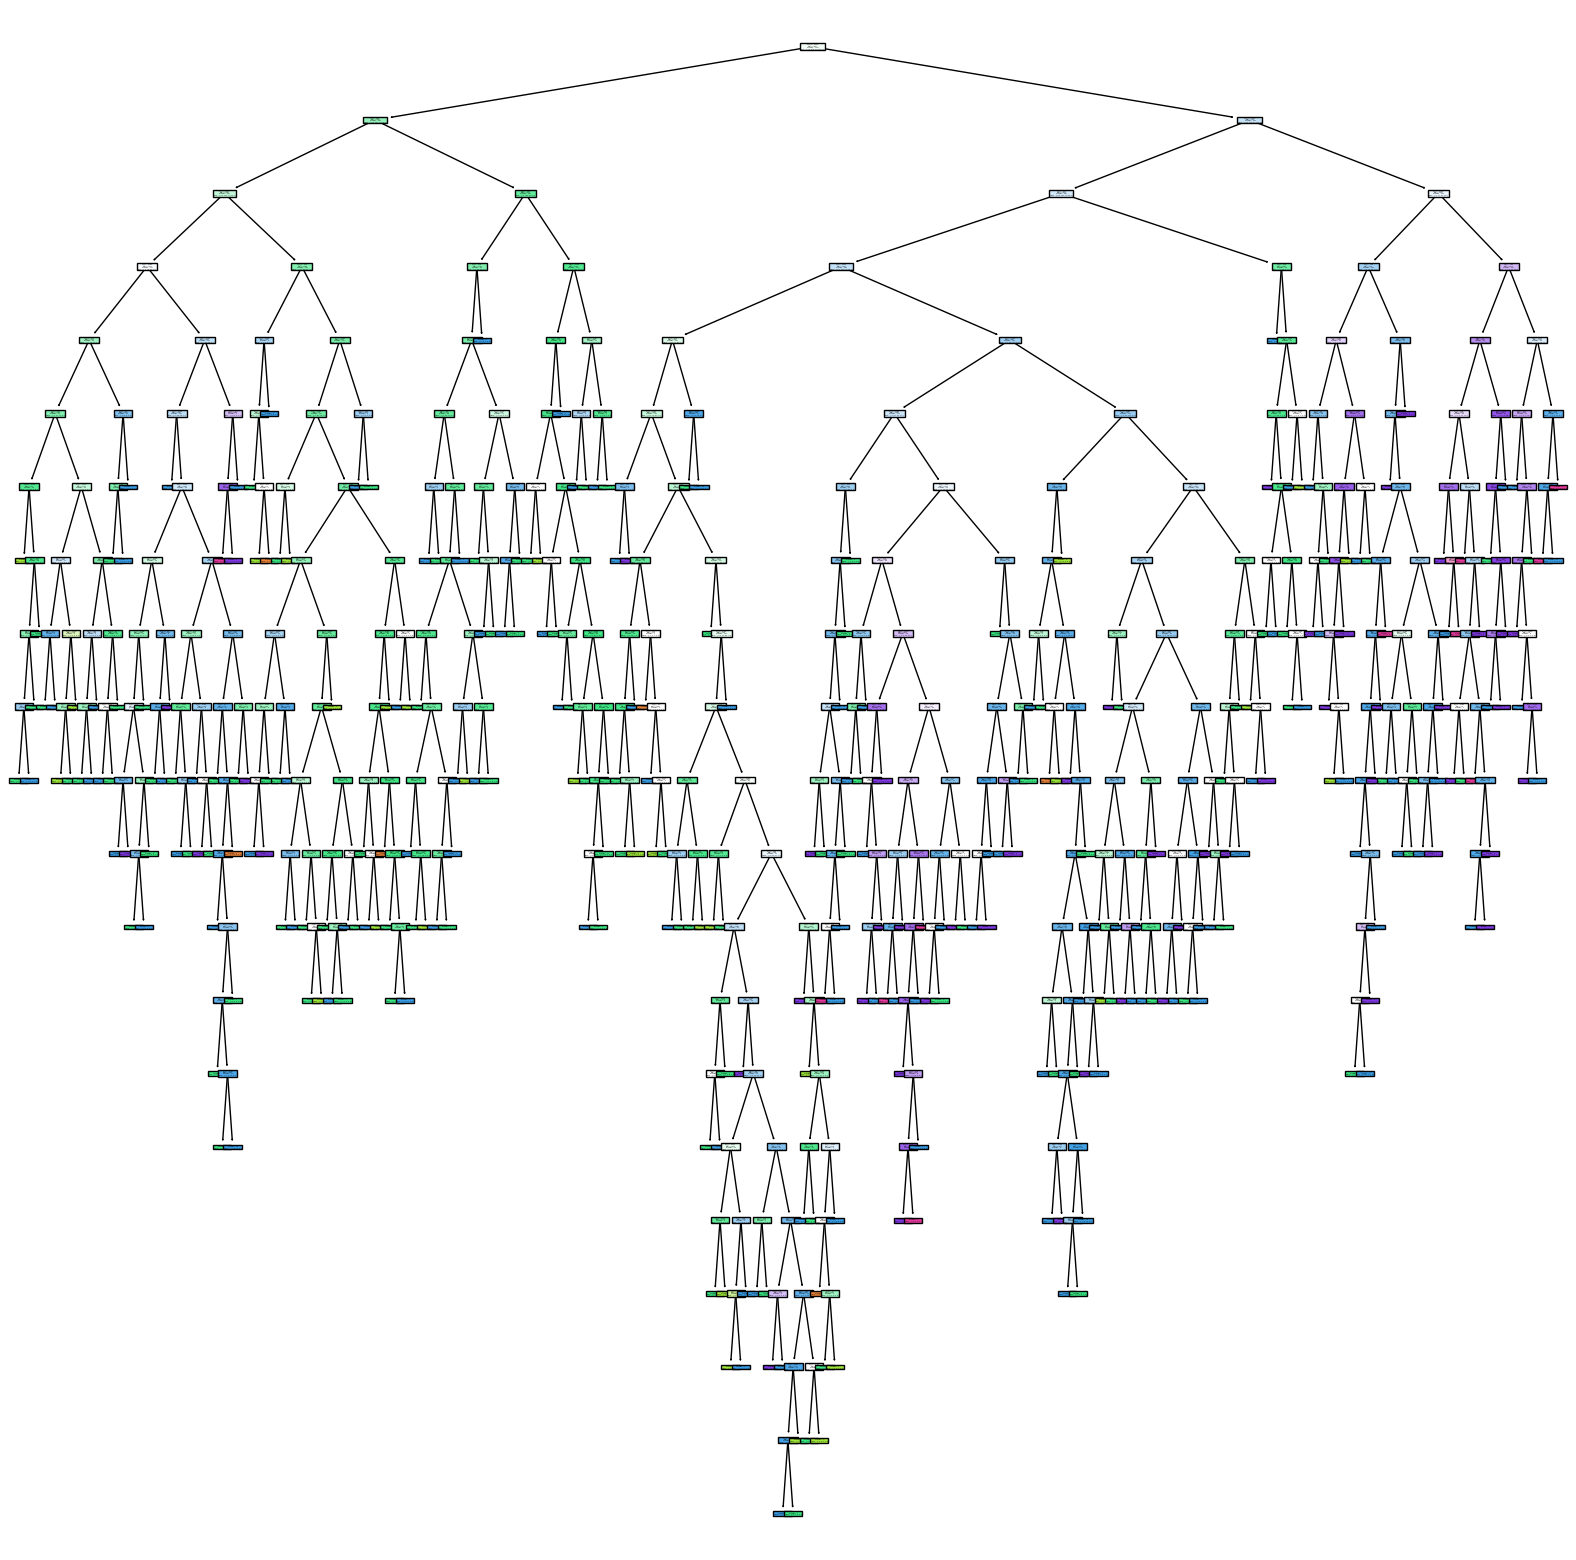

In [12]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, filled=True);

As we have a lot of data, due to which our decision tree depth increase a lot. let's take a random 50 sample and show the visualization again.

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [14]:
df2 = df.sample(250)

In [15]:
x2 = df2.drop('quality',axis=1) # feature
y2 = df2['quality']             # label 

In [16]:
x2_train, x2_test , y2_train, y2_test = train_test_split(x2, y2, test_size=0.25)

In [17]:
dt_model2 = DecisionTreeClassifier()

In [18]:
dt_model2.fit(x2_train, y2_train)

DecisionTreeClassifier()

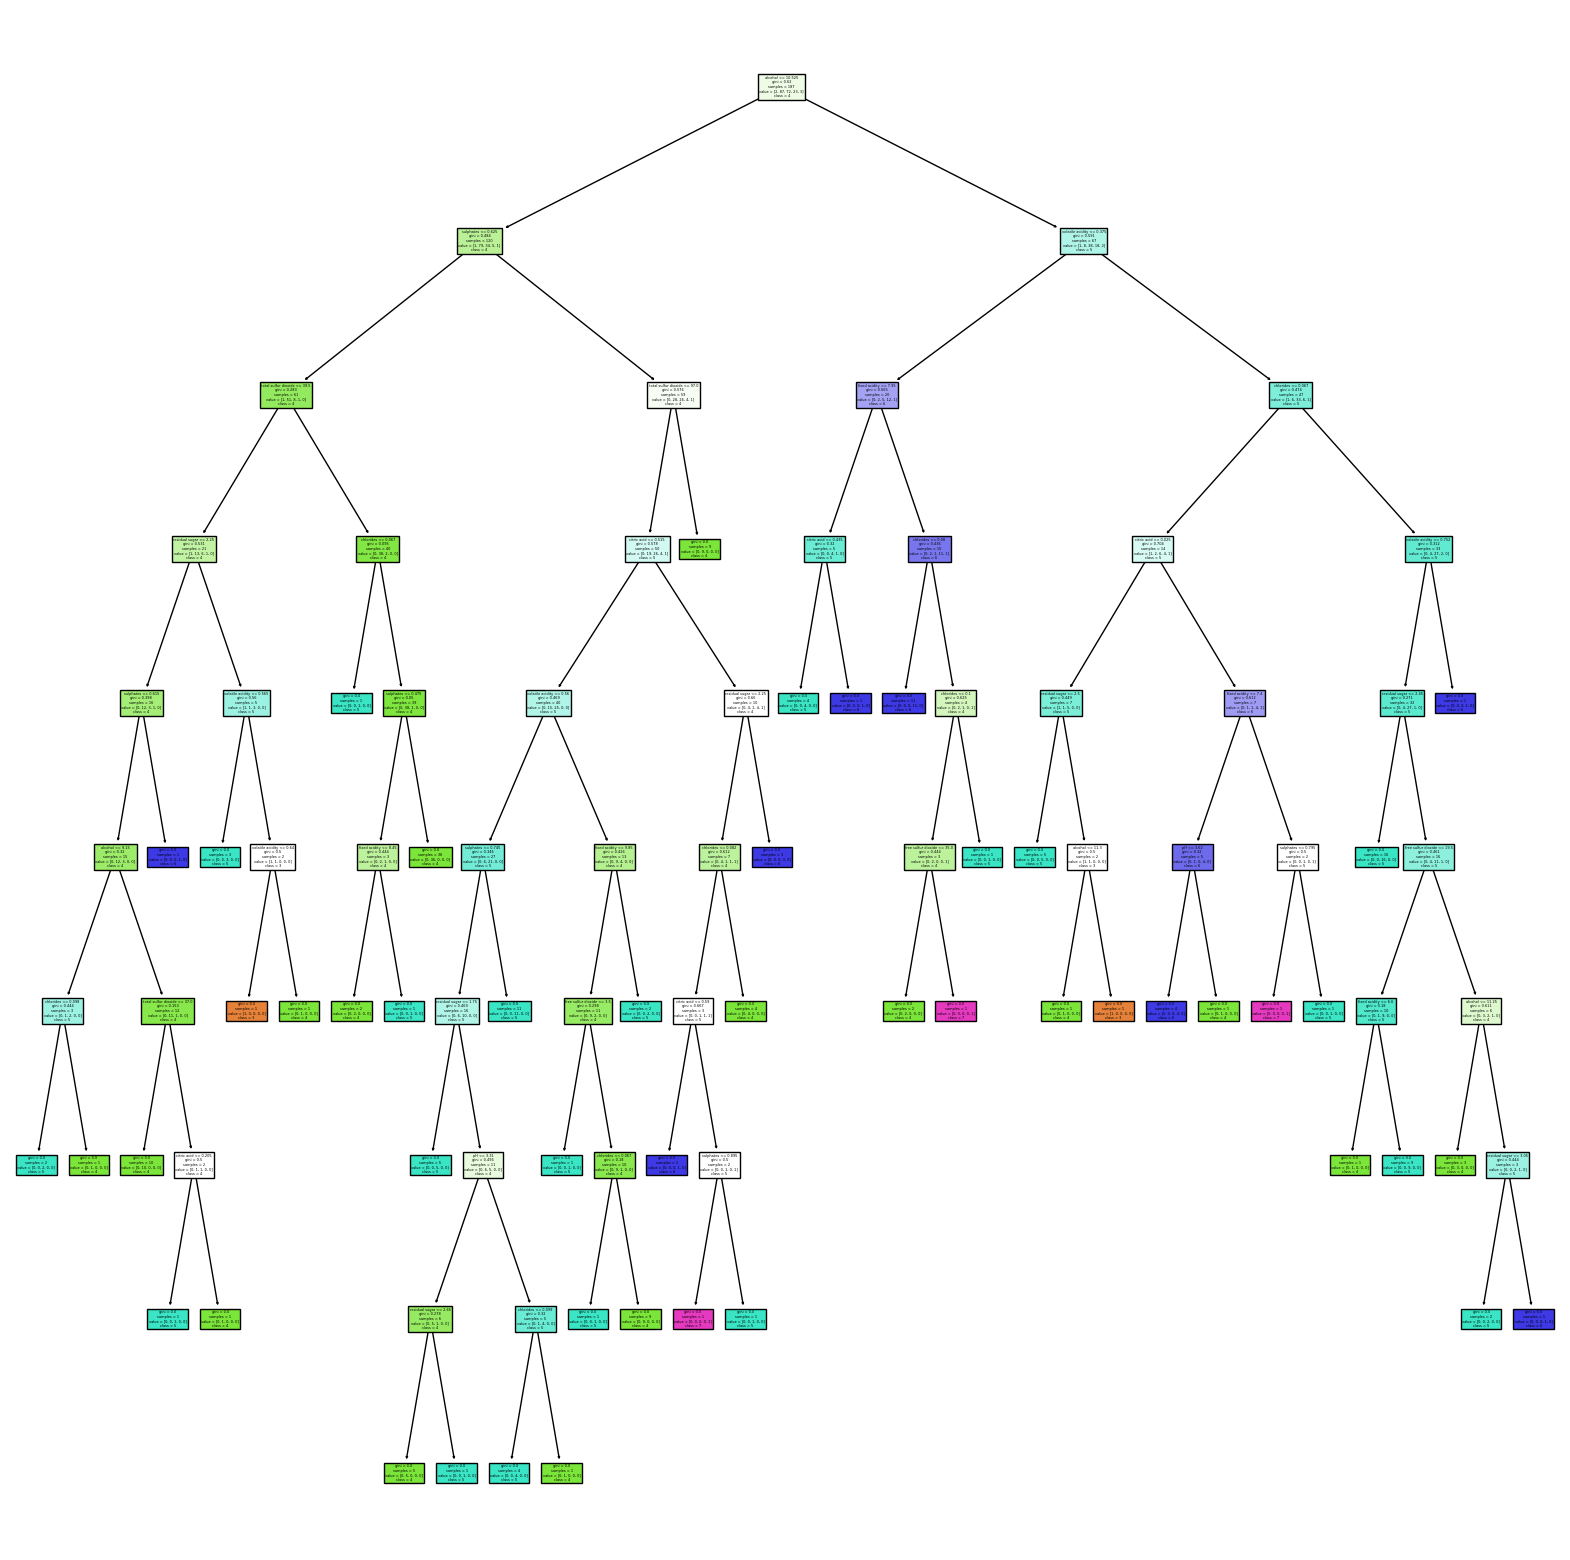

In [19]:
plt.figure(figsize=[20,20])
tree.plot_tree(dt_model2, filled=True, class_names=[str(i) for i in set(y2)], feature_names=x2.columns);
plt.savefig('dt_model1')

here value indicate, how many number of data we have drom the given data set. as we have a total of 4 unique data in the quality, so the value in the graph show that this many are from that category and so on.

In [20]:
dt_model2.score(x2_test, y2_test)

0.5396825396825397

In [21]:
 dt_model2.predict(x2)

array([5, 5, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5,
       5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6,
       6, 7, 6, 6, 5, 6, 7, 5, 6, 5, 6, 4, 6, 5, 6, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 5, 6, 7, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 7, 5, 7, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 5, 7, 8, 6, 5, 7, 7, 5, 7, 7, 6, 7, 5, 5, 5,
       4, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7,
       6, 6, 5, 7, 6, 6, 7, 5, 6, 5, 8, 6, 6, 7, 5, 6, 5, 5, 6, 6, 5, 6,
       5, 7, 7, 6, 5, 8, 7, 5, 5, 6, 5, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 6,
       5, 5, 6, 6, 5, 7, 6, 8, 5, 5, 7, 6, 6, 5, 5, 6, 6, 6, 5, 6, 7, 5,
       5, 5, 8, 6, 6, 5, 5, 6, 5, 5, 8, 5, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 6, 7, 6, 5, 5, 8])

`Post pruning`

In [22]:
path = dt_model2.cost_complexity_pruning_path(x2, y2)
ccp_alphas = path['ccp_alphas']

In [23]:
ccp_alphas

array([0.        , 0.003     , 0.00375   , 0.004     , 0.004     ,
       0.00533333, 0.00533333, 0.00533333, 0.00568889, 0.006     ,
       0.006     , 0.006     , 0.0064    , 0.00666667, 0.00671111,
       0.00685714, 0.00685714, 0.00737719, 0.0075    , 0.008     ,
       0.00834921, 0.00839259, 0.00866667, 0.00883333, 0.00914286,
       0.00925714, 0.00991877, 0.0102209 , 0.01066667, 0.01146667,
       0.01419487, 0.01628806, 0.02228785, 0.02679974, 0.03517877,
       0.10031114])

In [24]:
path

{'ccp_alphas': array([0.        , 0.003     , 0.00375   , 0.004     , 0.004     ,
        0.00533333, 0.00533333, 0.00533333, 0.00568889, 0.006     ,
        0.006     , 0.006     , 0.0064    , 0.00666667, 0.00671111,
        0.00685714, 0.00685714, 0.00737719, 0.0075    , 0.008     ,
        0.00834921, 0.00839259, 0.00866667, 0.00883333, 0.00914286,
        0.00925714, 0.00991877, 0.0102209 , 0.01066667, 0.01146667,
        0.01419487, 0.01628806, 0.02228785, 0.02679974, 0.03517877,
        0.10031114]),
 'impurities': array([0.        , 0.006     , 0.0135    , 0.0175    , 0.0255    ,
        0.03083333, 0.03616667, 0.0415    , 0.05856667, 0.06456667,
        0.07056667, 0.07656667, 0.08296667, 0.08963333, 0.09634444,
        0.10320159, 0.11005873, 0.11743592, 0.13243592, 0.14043592,
        0.15713434, 0.20748989, 0.21615656, 0.24265656, 0.25179942,
        0.26105656, 0.28089411, 0.3422195 , 0.35288617, 0.3758195 ,
        0.39001437, 0.4225905 , 0.44487835, 0.47167809, 0.50685686

In [25]:
dt_model3 = []
for i in ccp_alphas:
  dt_m = DecisionTreeClassifier(ccp_alpha=i)
  dt_m.fit(x2, y2)
  dt_model3.append(dt_m)

In [26]:
dt_model3

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.003),
 DecisionTreeClassifier(ccp_alpha=0.00375),
 DecisionTreeClassifier(ccp_alpha=0.004),
 DecisionTreeClassifier(ccp_alpha=0.004),
 DecisionTreeClassifier(ccp_alpha=0.005333333333333333),
 DecisionTreeClassifier(ccp_alpha=0.005333333333333333),
 DecisionTreeClassifier(ccp_alpha=0.005333333333333333),
 DecisionTreeClassifier(ccp_alpha=0.005688888888888892),
 DecisionTreeClassifier(ccp_alpha=0.006),
 DecisionTreeClassifier(ccp_alpha=0.006),
 DecisionTreeClassifier(ccp_alpha=0.006),
 DecisionTreeClassifier(ccp_alpha=0.006399999999999999),
 DecisionTreeClassifier(ccp_alpha=0.006666666666666667),
 DecisionTreeClassifier(ccp_alpha=0.006711111111111109),
 DecisionTreeClassifier(ccp_alpha=0.0068571428571428585),
 DecisionTreeClassifier(ccp_alpha=0.0068571428571428585),
 DecisionTreeClassifier(ccp_alpha=0.007377192982456145),
 DecisionTreeClassifier(ccp_alpha=0.007500000000000001),
 DecisionTreeClassifier(ccp_alpha=0.008),
 Decis

In [27]:
train_score = [i.score(x2, y2) for i in dt_model3] # train score of all 9 model

In [28]:
test_score = [i.score(x2_test, y2_test) for i in dt_model3] # test score for all 9 model

In [29]:
train_score

[1.0,
 0.996,
 0.992,
 0.976,
 0.98,
 0.968,
 0.964,
 0.952,
 0.952,
 0.932,
 0.932,
 0.948,
 0.936,
 0.916,
 0.944,
 0.9,
 0.936,
 0.92,
 0.912,
 0.912,
 0.876,
 0.848,
 0.856,
 0.84,
 0.836,
 0.824,
 0.8,
 0.76,
 0.752,
 0.736,
 0.724,
 0.712,
 0.672,
 0.648,
 0.648,
 0.484]

In [30]:
test_score

[1.0,
 1.0,
 1.0,
 0.9841269841269841,
 1.0,
 1.0,
 1.0,
 0.9841269841269841,
 0.9841269841269841,
 0.9523809523809523,
 0.9523809523809523,
 0.9841269841269841,
 0.9682539682539683,
 0.9206349206349206,
 0.9682539682539683,
 0.9047619047619048,
 0.9682539682539683,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.8888888888888888,
 0.8412698412698413,
 0.873015873015873,
 0.8571428571428571,
 0.8253968253968254,
 0.8253968253968254,
 0.8412698412698413,
 0.7936507936507936,
 0.7777777777777778,
 0.7619047619047619,
 0.746031746031746,
 0.746031746031746,
 0.6984126984126984,
 0.7142857142857143,
 0.7142857142857143,
 0.5396825396825397]

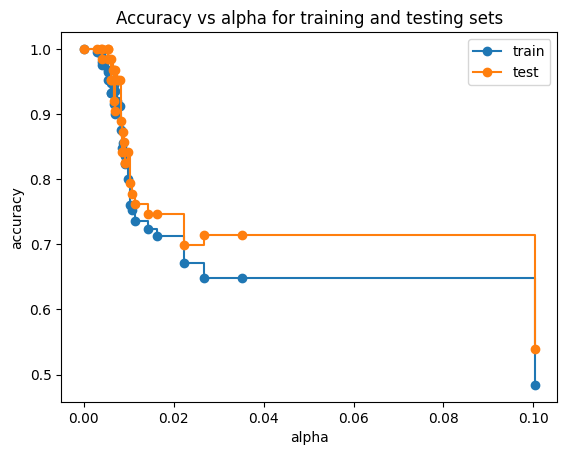

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [32]:
dt_model_ccp = DecisionTreeClassifier(random_state=0, ccp_alpha=0.05)
dt_model_ccp.fit(x2, y2)

DecisionTreeClassifier(ccp_alpha=0.05, random_state=0)

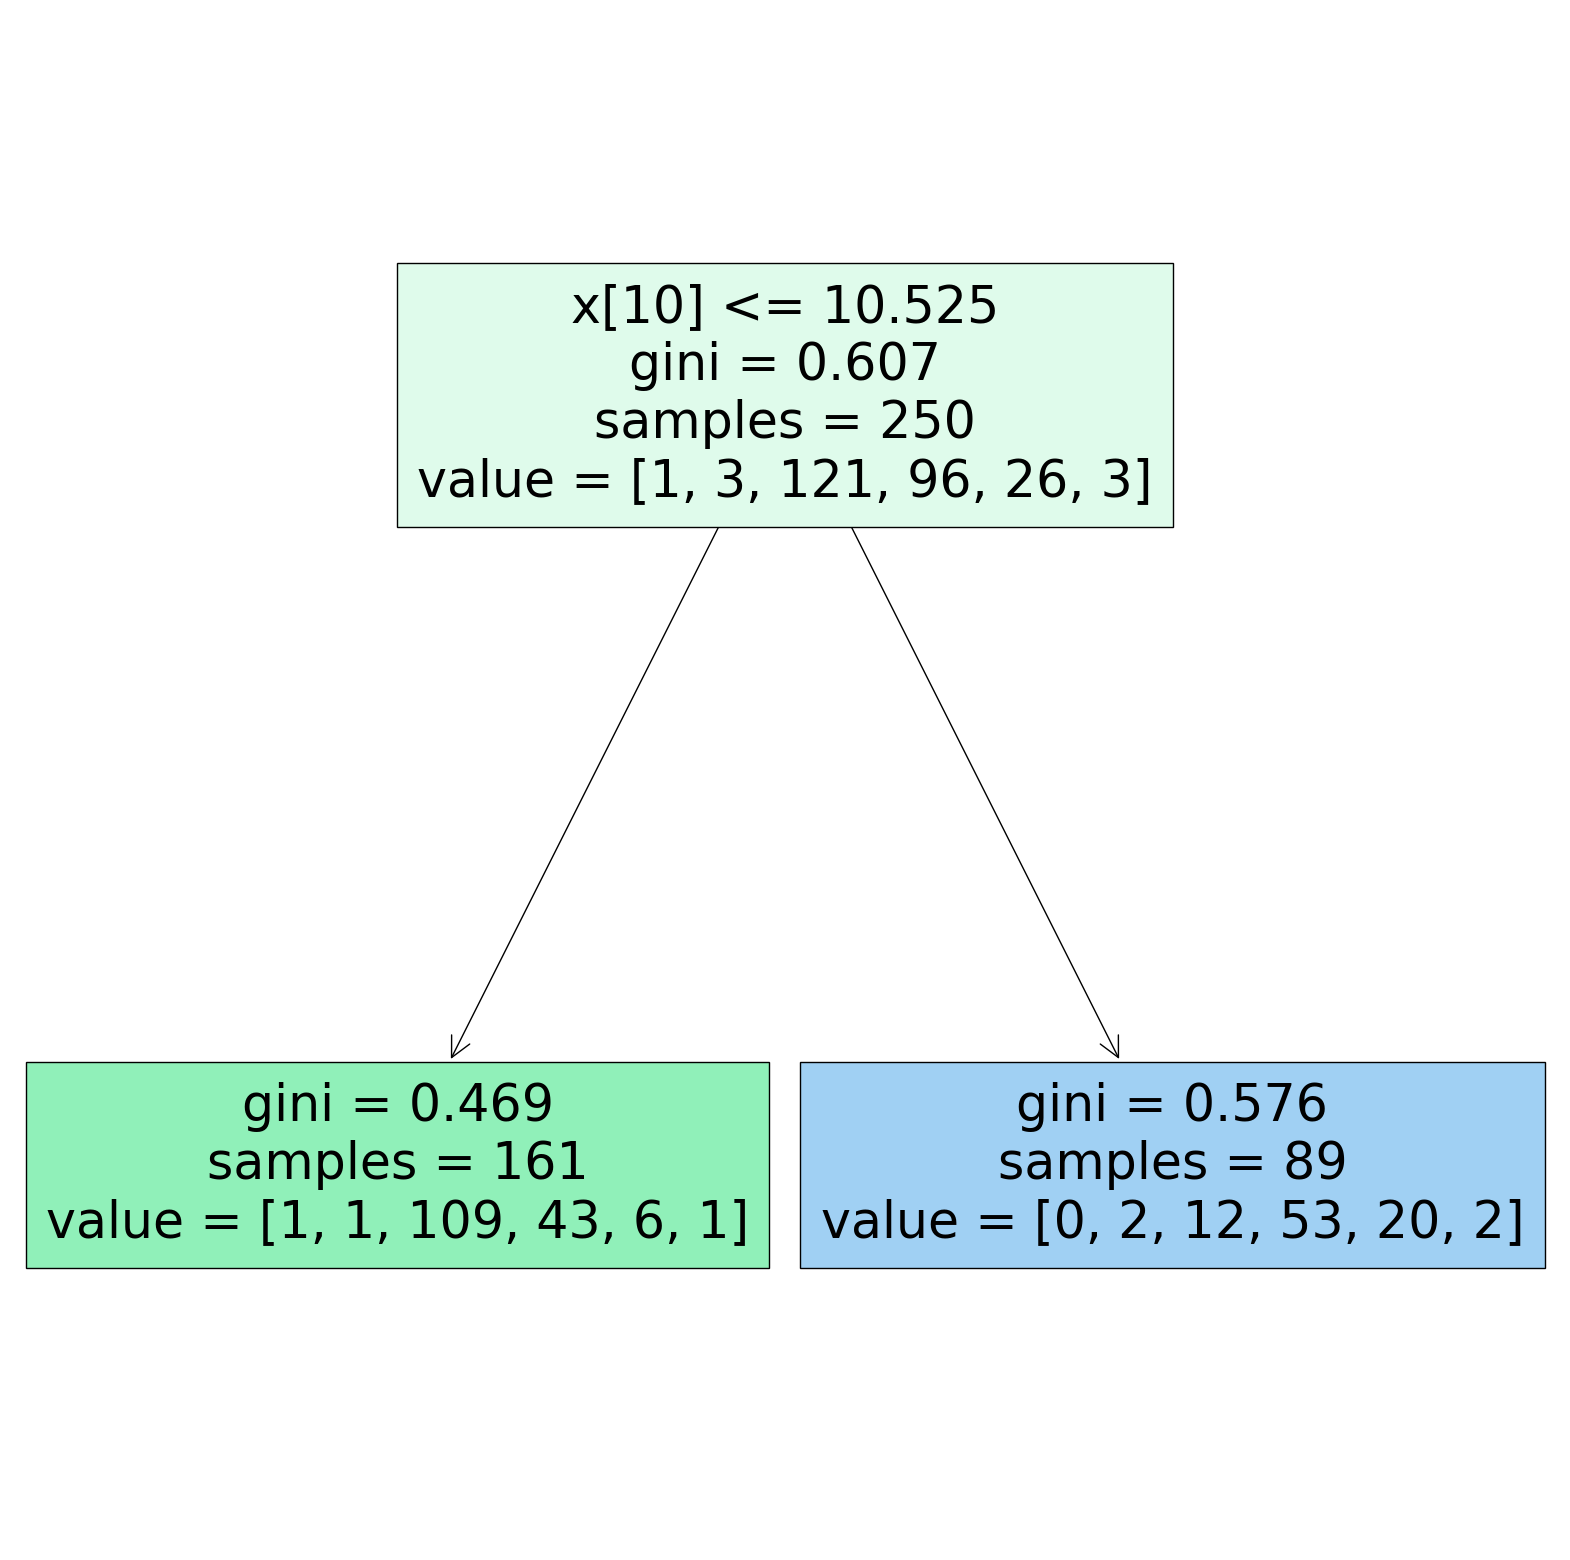

In [33]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp, filled=True);

In [34]:
dt_model_ccp.score(x2, y2)

0.648

In [35]:
dt_model_ccp.score(x2_test, y2_test)

0.7142857142857143

In [36]:
grid_pram = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : range(2, 40, 1),
    'min_samples_split' : range(2, 40, 1)
}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_cpp = GridSearchCV(estimator = dt_model_ccp, param_grid = grid_pram, cv = 5, n_jobs = -1)

In [39]:
grid_cpp.fit(x2, y2)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.05, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_split': range(2, 40),
                         'splitter': ['best', 'random']})

In [40]:
grid_cpp.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [41]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split = 2, splitter = 'best')

In [42]:
dt_cpp_new.fit(x2, y2)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [43]:
dt_cpp_new.score(x2, y2)

0.672

In [44]:
dt_cpp_new.score(x2_test, y2_test)

0.6984126984126984